In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Cost_of_Living_Index_2022.csv')

In [3]:
print(data.isnull().sum())

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64


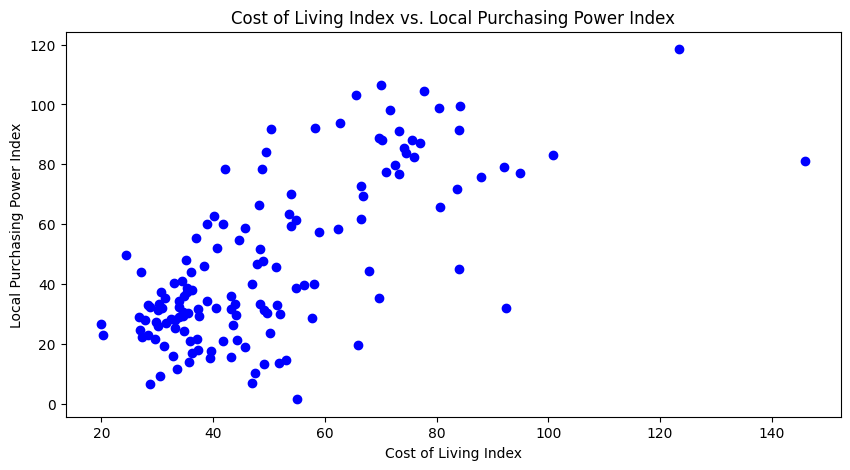

In [4]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Cost of Living Index'], data['Local Purchasing Power Index'], color='blue')
plt.title('Cost of Living Index vs. Local Purchasing Power Index')
plt.xlabel('Cost of Living Index')
plt.ylabel('Local Purchasing Power Index')
plt.show()

In [5]:
print(data.describe())

             Rank  Cost of Living Index  Rent Index  \
count  139.000000            139.000000  139.000000   
mean    70.000000             50.188633   19.291511   
std     40.269923             20.860222   15.317726   
min      1.000000             19.920000    2.720000   
25%     35.500000             34.715000    9.515000   
50%     70.000000             44.680000   13.930000   
75%    104.500000             62.580000   25.070000   
max    139.000000            146.040000   98.580000   

       Cost of Living Plus Rent Index  Groceries Index  \
count                      139.000000       139.000000   
mean                        35.705324        46.637842   
std                         17.542523        20.952229   
min                         12.090000        14.920000   
25%                         23.310000        31.200000   
50%                         31.260000        40.220000   
75%                         44.865000        56.590000   
max                        123.800000   

In [7]:
columns_to_include = [
    'Cost of Living Index', 
    'Cost of Living Plus Rent Index', 
    'Restaurant Price Index', 
    'Local Purchasing Power Index',
    'Rent Index',
    'Groceries Index',
]

corr_matrix = data[columns_to_include].corr()
print(corr_matrix)

                                Cost of Living Index  \
Cost of Living Index                        1.000000   
Cost of Living Plus Rent Index              0.974752   
Restaurant Price Index                      0.934505   
Local Purchasing Power Index                0.687244   
Rent Index                                  0.838079   
Groceries Index                             0.965435   

                                Cost of Living Plus Rent Index  \
Cost of Living Index                                  0.974752   
Cost of Living Plus Rent Index                        1.000000   
Restaurant Price Index                                0.917878   
Local Purchasing Power Index                          0.695304   
Rent Index                                            0.938735   
Groceries Index                                       0.936967   

                                Restaurant Price Index  \
Cost of Living Index                          0.934505   
Cost of Living Plus Rent Ind

In [8]:
X = data[['Cost of Living Index']] 
y = data['Local Purchasing Power Index']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2):', r2_score(y_test, y_pred))

Mean Squared Error: 352.64650886230584
Coefficient of Determination (R^2): 0.380779884254945


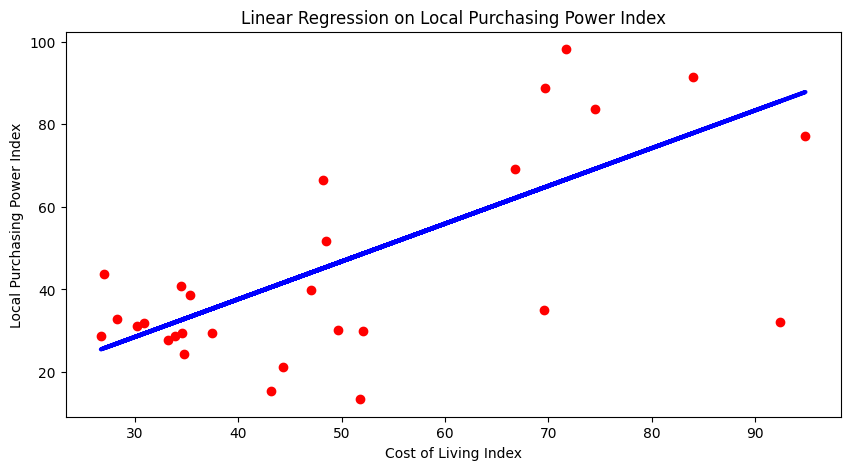

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression on Local Purchasing Power Index')
plt.xlabel('Cost of Living Index')
plt.ylabel('Local Purchasing Power Index')
plt.show()

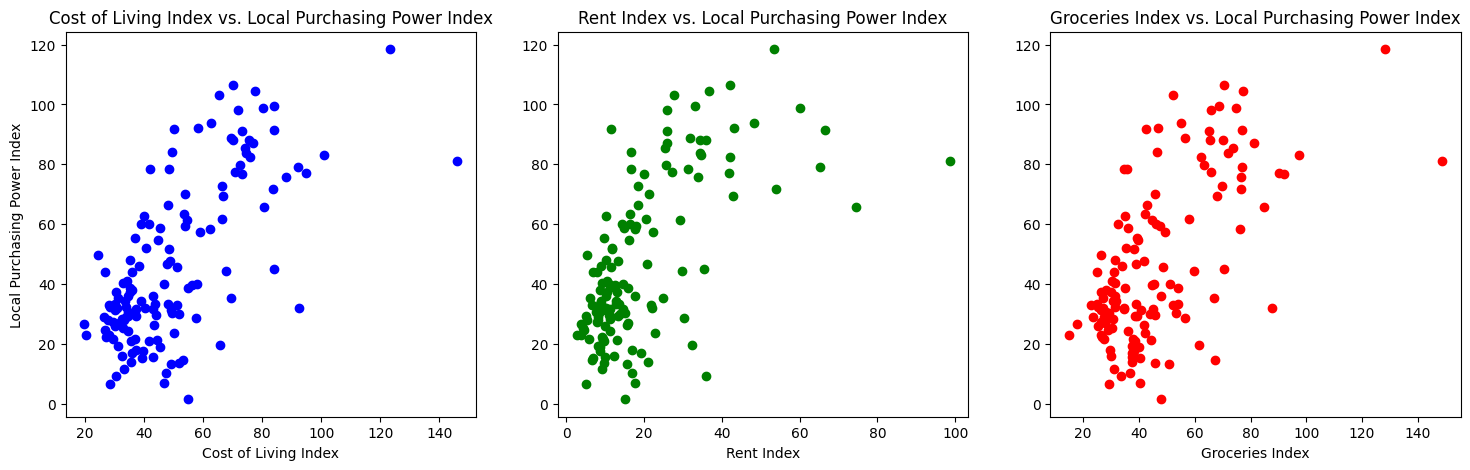

Mean Squared Error: 323.54092579380693
Coefficient of Determination (R^2): 0.43188704699036384


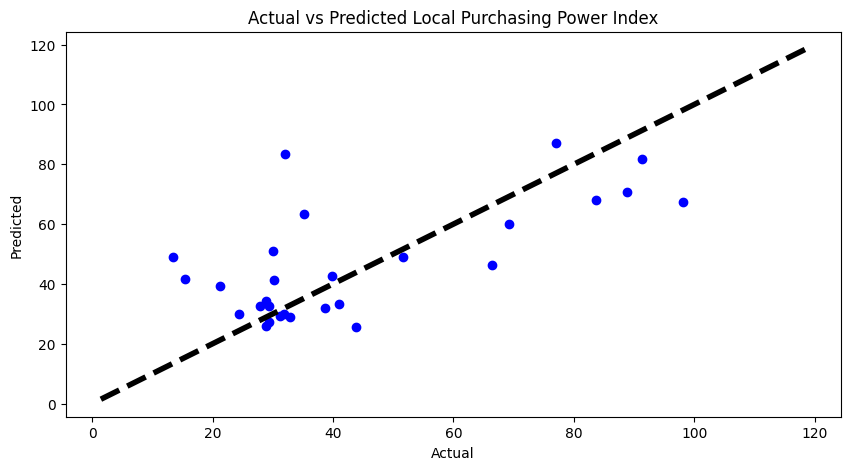

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].scatter(data['Cost of Living Index'], data['Local Purchasing Power Index'], color='blue')
ax[0].set_title('Cost of Living Index vs. Local Purchasing Power Index')
ax[0].set_xlabel('Cost of Living Index')
ax[0].set_ylabel('Local Purchasing Power Index')

ax[1].scatter(data['Rent Index'], data['Local Purchasing Power Index'], color='green')
ax[1].set_title('Rent Index vs. Local Purchasing Power Index')
ax[1].set_xlabel('Rent Index')

ax[2].scatter(data['Groceries Index'], data['Local Purchasing Power Index'], color='red')
ax[2].set_title('Groceries Index vs. Local Purchasing Power Index')
ax[2].set_xlabel('Groceries Index')

plt.show()

X = data[['Cost of Living Index', 'Rent Index', 'Groceries Index']]  # Independent variables
y = data['Local Purchasing Power Index']  # Dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2):', r2_score(y_test, y_pred))

# Plotting the regression predictions along with actual data
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.title('Actual vs Predicted Local Purchasing Power Index')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()